# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split

%matplotlib inline

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.float_format = '{:,.3f}'.format
sns.set()

<h1><b> TRAIN DATA</b></h1>

# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd

file_path = "/content/drive/My Drive/pubg.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

print(df.head())


               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        0.000      0              0      0         60  ...        0   
1       91.470      0              0      0         57  ...        0   
2       68.000      0              0      0         47  ...        0   
3       32.900      0              0      0         75  ...        0   
4      100.000      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0         0.000          0         0.000          0               0   
1   

In [5]:
# Split data into train (80%) and test (20%)
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Check train dataset information
train.info()

# Memory usage in MB
print("Reduced Memory size: ", train.memory_usage(index=True).sum() / (1024 * 1024), "MB")



<class 'pandas.core.frame.DataFrame'>
Index: 3557572 entries, 4367250 to 1692743
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints  

In [6]:
%%time
train.info()

# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

# Memory usages in Bytes
print(train.memory_usage(index=True).sum()/(1024*1024), "MB")

<class 'pandas.core.frame.DataFrame'>
Index: 3557572 entries, 4367250 to 1692743
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints  

# Reducing Dataset Memory

### Here we are reducing the memory of the dataset by downcasting the datatypes of the column as small as possible so that there will be less time consumption for applying computational operations on it

In [7]:
for column_name in train:
    if train[column_name].dtype=='float64':
        train[column_name] = pd.to_numeric(train[column_name], downcast= 'float')
    if train[column_name].dtype=='int64':
        train[column_name] = pd.to_numeric(train[column_name],downcast='integer')

In [8]:
%%time
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3557572 entries, 4367250 to 1692743
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float32
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float32
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float32
 21  roadKills        int8   
 22  swimDistance     float32
 23  teamKills        int8   
 24  vehicleDestroys  int8   
 25  walkDistance     float32
 26  weaponsAcquired  int16  
 27  winPoints  

### Here we can see memory is reduced by significant amount

In [9]:
# Memory usages in Bytes
print("Reduced Memory size: ",train.memory_usage(index=True).sum()/(1024*1024), "MB")

print("Data Description:")
train.describe().drop('count').T

Reduced Memory size:  298.5633239746094 MB
Data Description:


mean       std    min       25%       50%       75%  \
assists             0.234     0.589  0.000     0.000     0.000     0.000   
boosts              1.107     1.716  0.000     0.000     0.000     2.000   
damageDealt       130.766   170.126  0.000     0.000    84.310   186.000   
DBNOs               0.658     1.146  0.000     0.000     0.000     1.000   
headshotKills       0.227     0.603  0.000     0.000     0.000     0.000   
heals               1.371     2.679  0.000     0.000     0.000     2.000   
killPlace          47.591    27.462  1.000    24.000    47.000    71.000   
killPoints        505.134   627.564  0.000     0.000     0.000 1,172.000   
kills               0.925     1.560  0.000     0.000     0.000     1.000   
killStreaks         0.544     0.711  0.000     0.000     0.000     1.000   
longestKill        23.008    51.052  0.000     0.000     0.000    21.330   
matchDuration   1,579.588   258.696  9.000 1,367.000 1,438.000 1,851.000   
maxPlace           44.503    23.830  1.000    28.000    30.000    49.000   
numGroups          43.006    23.293  1.000    27.000    30.000    47.000   
rankPoints        891.875   736.661 -1.000    -1.000 1,443.000 1,500.000   
revives             0.165     0.473  0.000     0.000     0.000     0.000   
rideDistance      606.492 1,508.591  0.000     0.000     0.000     0.245   
roadKills           0.003     0.073  0.000     0.000     0.000     0.000   
swimDistance        4.514    30.236  0.000     0.000     0.000     0.000   
teamKills           0.024     0.168  0.000     0.000     0.000     0.000   
vehicleDestroys     0.008     0.092  0.000     0.000     0.000     0.000   
walkDistance    1,154.635 1,182.401  0.000   155.200   686.000 1,977.000   
weaponsAcquired     3.660     2.454  0.000     2.000     3.000     5.000   
winPoints         606.581   739.727  0.000     0.000     0.000 1,495.000   
winPlacePerc        0.473     0.307  0.000     0.200     0.458     0.741   

                       max  
assists             22.000  
boosts              28.000  
damageDealt      6,616.000  
DBNOs               53.000  
headshotKills       64.000  
heals               80.000  
killPlace          101.000  
killPoints       2,154.000  
kills               72.000  
killStreaks         20.000  
longestKill      1,094.000  
matchDuration    2,237.000  
maxPlace           100.000  
numGroups          100.000  
rankPoints       5,827.000  
revives             39.000  
rideDistance    40,710.000  
roadKills           14.000  
swimDistance     3,514.000  
teamKills           12.000  
vehicleDestroys      5.000  
walkDistance    25,780.000  
weaponsAcquired    236.000  
winPoints        2,002.000  
winPlacePerc         1.000

:### Number of NULL value in Data

In [10]:
train.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

#### Here we can see there is only one null value for winPlacePerc feature, means it is an illegal match, hence we can drop that row as 1 row in compare to the size of the dataset won't affect the output!!

In [11]:
train.dropna(inplace=True)

#### Dropping the Id column as it will be of no use

> Add blockquote



In [12]:
train.drop(['Id'], axis=1, inplace=True)

In [13]:
labelencoder = LabelEncoder()

In [14]:
train['matchType'].value_counts()

matchType
squad-fpp           1405464
duo-fpp              796801
squad                501552
solo-fpp             429680
duo                  250584
solo                 145324
normal-squad-fpp      13713
crashfpp               5042
normal-duo-fpp         4417
flaretpp               1995
normal-solo-fpp        1334
flarefpp                557
normal-squad            406
crashtpp                289
normal-solo             251
normal-duo              162
Name: count, dtype: int64

In [15]:
## So from the above there are many matchtypes with combination of fpp, tpp , solo, duo ,squad,etc.
## So we are generalizing them into only solo, duo and squad.
## After that applying LabelEncoding to matchType column

train['matchType'] = train['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad')

train['matchType'] = labelencoder.fit_transform(train['matchType'])
train['matchType'].value_counts()

matchType
2    1923687
0    1057295
1     576589
Name: count, dtype: int64

In [16]:
train1 = train.copy()
# train2 = train.copy()

## EDA

In [17]:
train1.columns

Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

### Univariate Analysis

### Plotting graph for some of the discrete columns

In [18]:
# Discrete Columns
dis_cols_1 = ['assists', 'boosts', 'heals', 'DBNOs', 'headshotKills', 'kills']
dis_cols_2 = ['killStreaks', 'revives', 'roadKills', 'teamKills', 'weaponsAcquired','vehicleDestroys']

def discreteGraph(dis_cols):
    fig = plt.figure(figsize = (20, 15))

    index = 1
    for col in dis_cols:
        plt.subplot(3, 2, index)
        sns.countplot(x=col, data=train1)
        index += 1
    plt.tight_layout()
    plt.show()

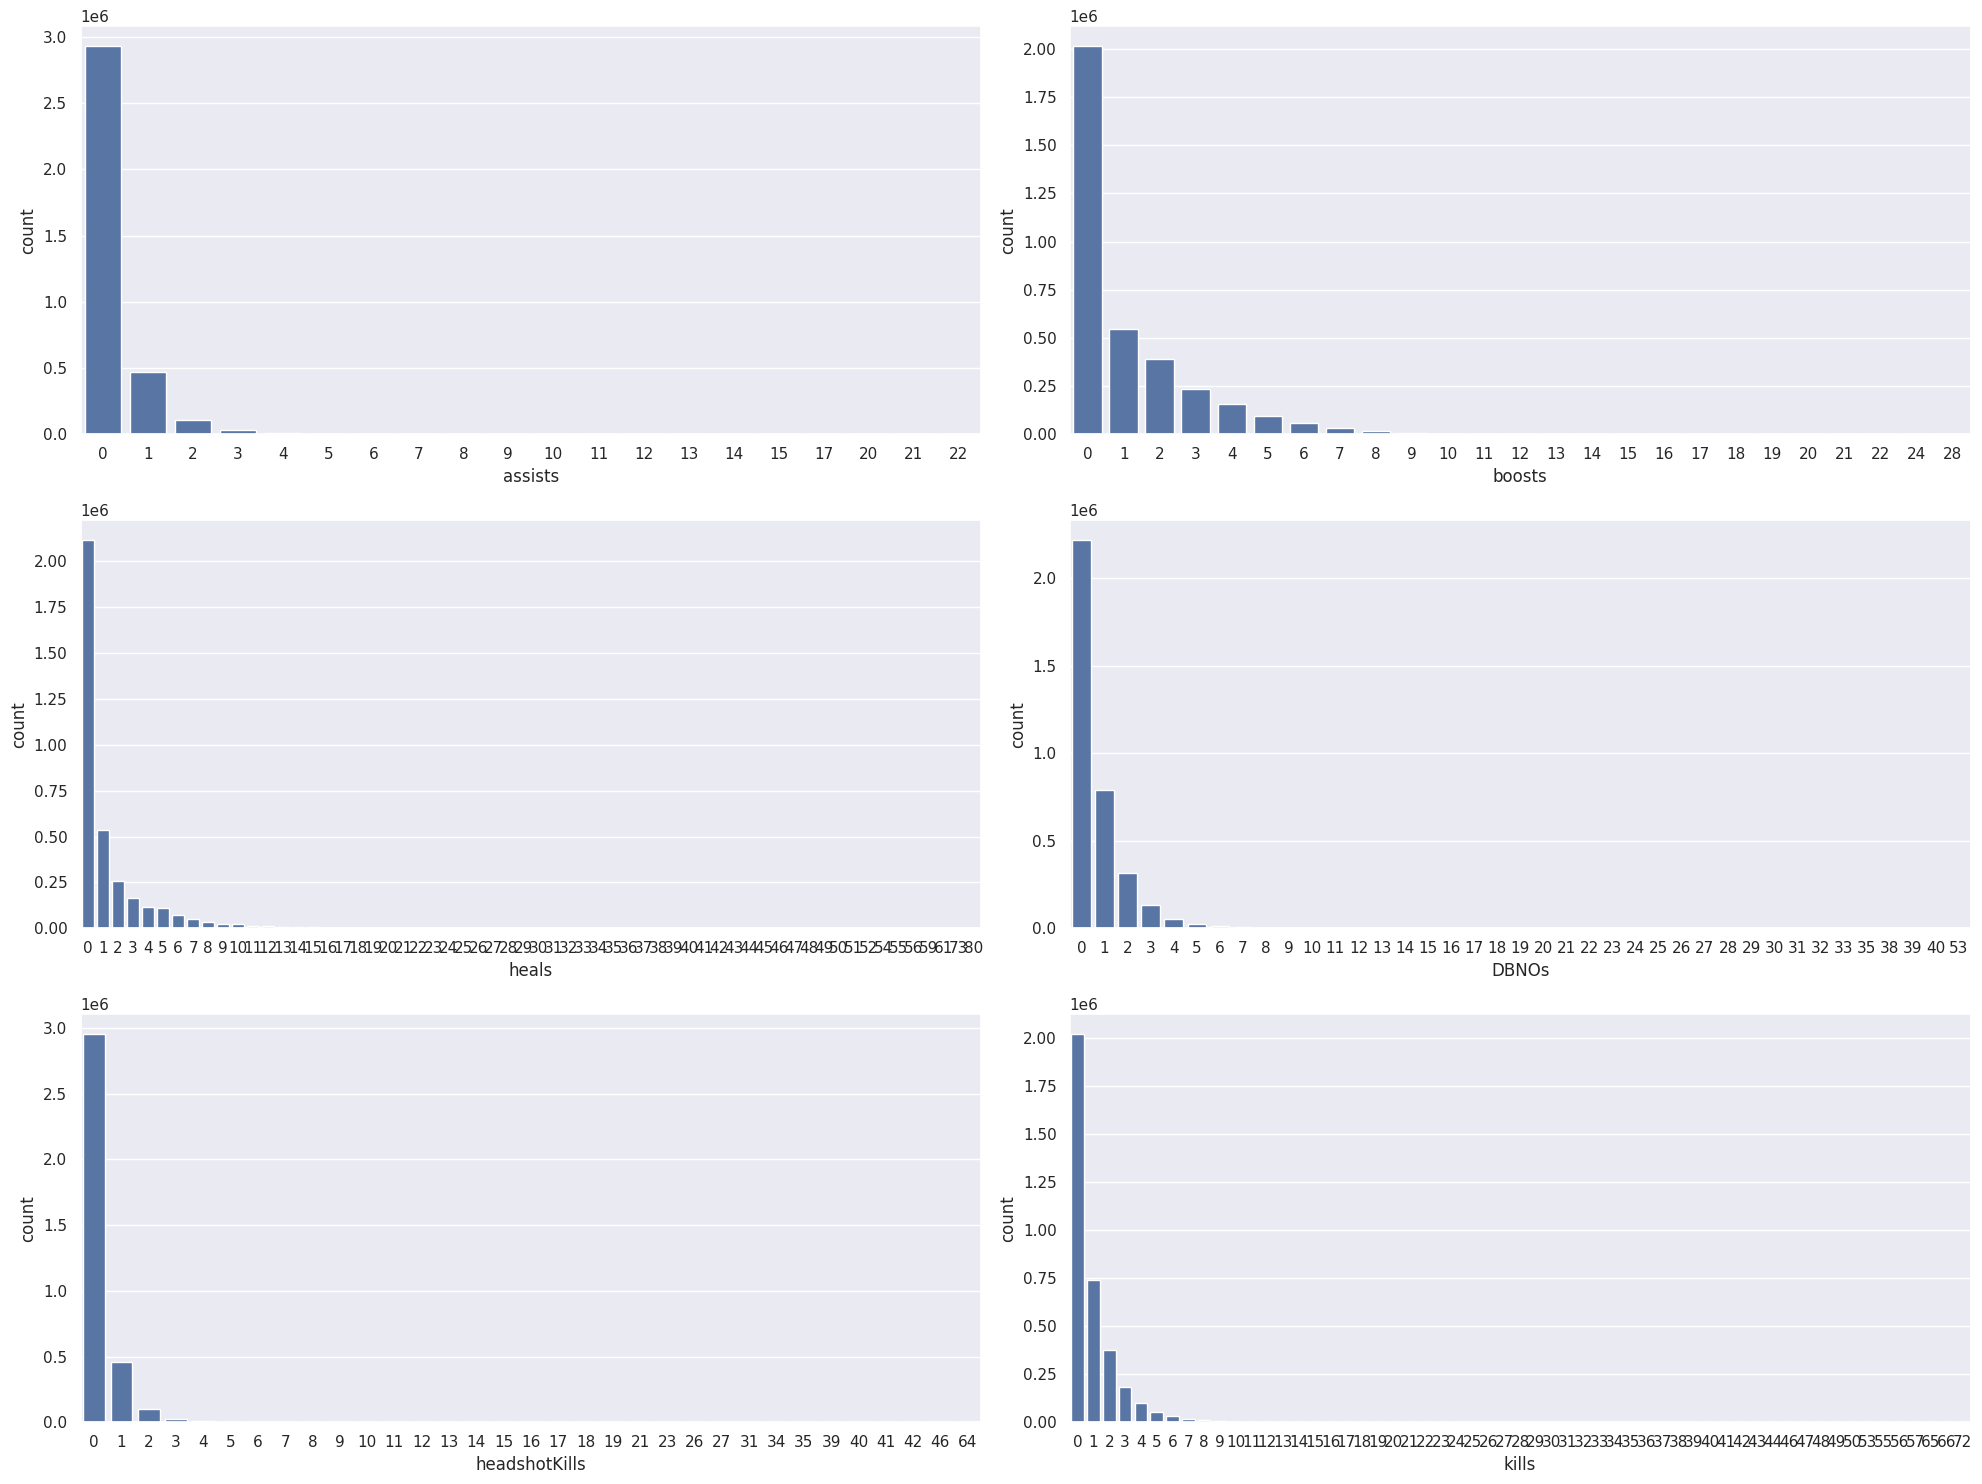

In [19]:
discreteGraph(dis_cols_1)

### Here from the graph we can see all the above feature have their most of the value lying in the zero region and their higher values graph are somewhat sparse on the basis of count.

### Player Types

In [20]:
players = train1['matchType'].value_counts()
print("Squad Players  : ",players[2])
print("Duo Players  : ",players[0])
print("Solo Players  : ",players[1])
print("Total Players : ",players[0]+players[1]+players[2])


Squad Players  :  1923687
Duo Players  :  1057295
Solo Players  :  576589
Total Players :  3557571


### So here we have the players as above distributed and the data consist of total 3112875 players

### Kills Analysis

In [21]:
print("Kills")
print("99% of the players have kills less than or equal to", train1['kills'].quantile(0.99))
print("Whereas maximum kill is ", train1['kills'].max())
print("And the minimum kill is", train1['kills'].min())

Kills
99% of the players have kills less than or equal to 7.0
Whereas maximum kill is  72
And the minimum kill is 0


### Continuous columns

In [22]:
cont_dist = ['killPoints', 'longestKill', 'maxPlace', 'rankPoints', 'rideDistance',
             'swimDistance', 'walkDistance', 'winPoints', 'winPlacePerc']

In [23]:
train1.dtypes


groupId             object
matchId             object
assists               int8
boosts                int8
damageDealt        float32
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints           int16
kills                 int8
killStreaks           int8
longestKill        float32
matchDuration        int16
matchType            int64
maxPlace              int8
numGroups             int8
rankPoints           int16
revives               int8
rideDistance       float32
roadKills             int8
swimDistance       float32
teamKills             int8
vehicleDestroys       int8
walkDistance       float32
weaponsAcquired      int16
winPoints            int16
winPlacePerc       float32
dtype: object

<Axes: >

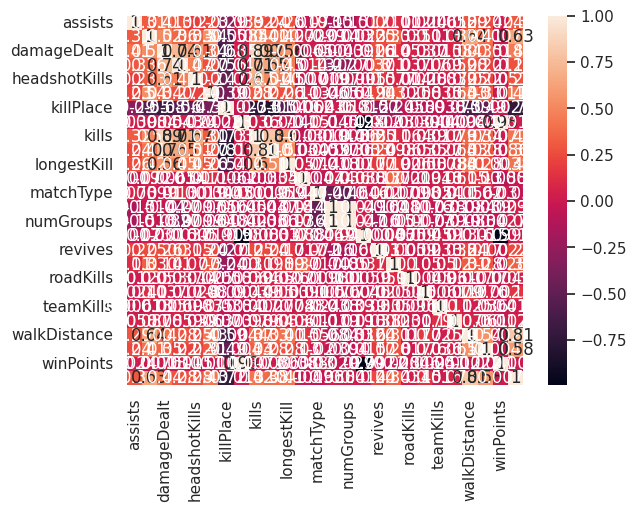

In [24]:
sns.heatmap(train1.select_dtypes(include=['number']).corr(), annot=True)


In [25]:
train1 = train1.apply(lambda col: pd.factorize(col)[0] if col.dtype == 'object' else col)


In [26]:
print(train1.columns)


Index(['groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')


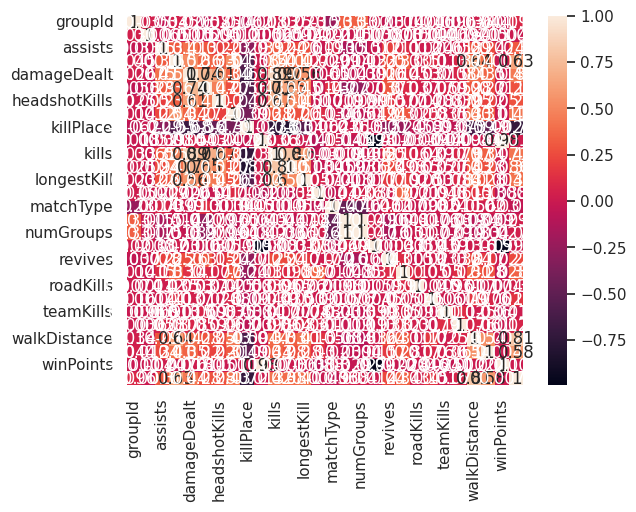

In [27]:
numeric_train1 = train1.select_dtypes(include=['number'])
sns.heatmap(numeric_train1.corr(), annot=True)
plt.show()


In [28]:
train1['matchType'] = train1['matchType'].astype('category').cat.codes


In [29]:
train1 = train1.apply(pd.to_numeric, errors='coerce')  # Convert everything to numbers, replace errors with NaN
train1.fillna(0, inplace=True)  # Replace NaN with 0


In [30]:
train1['damageDealt'] = pd.to_numeric(train1['damageDealt'], errors='coerce')


<Axes: >

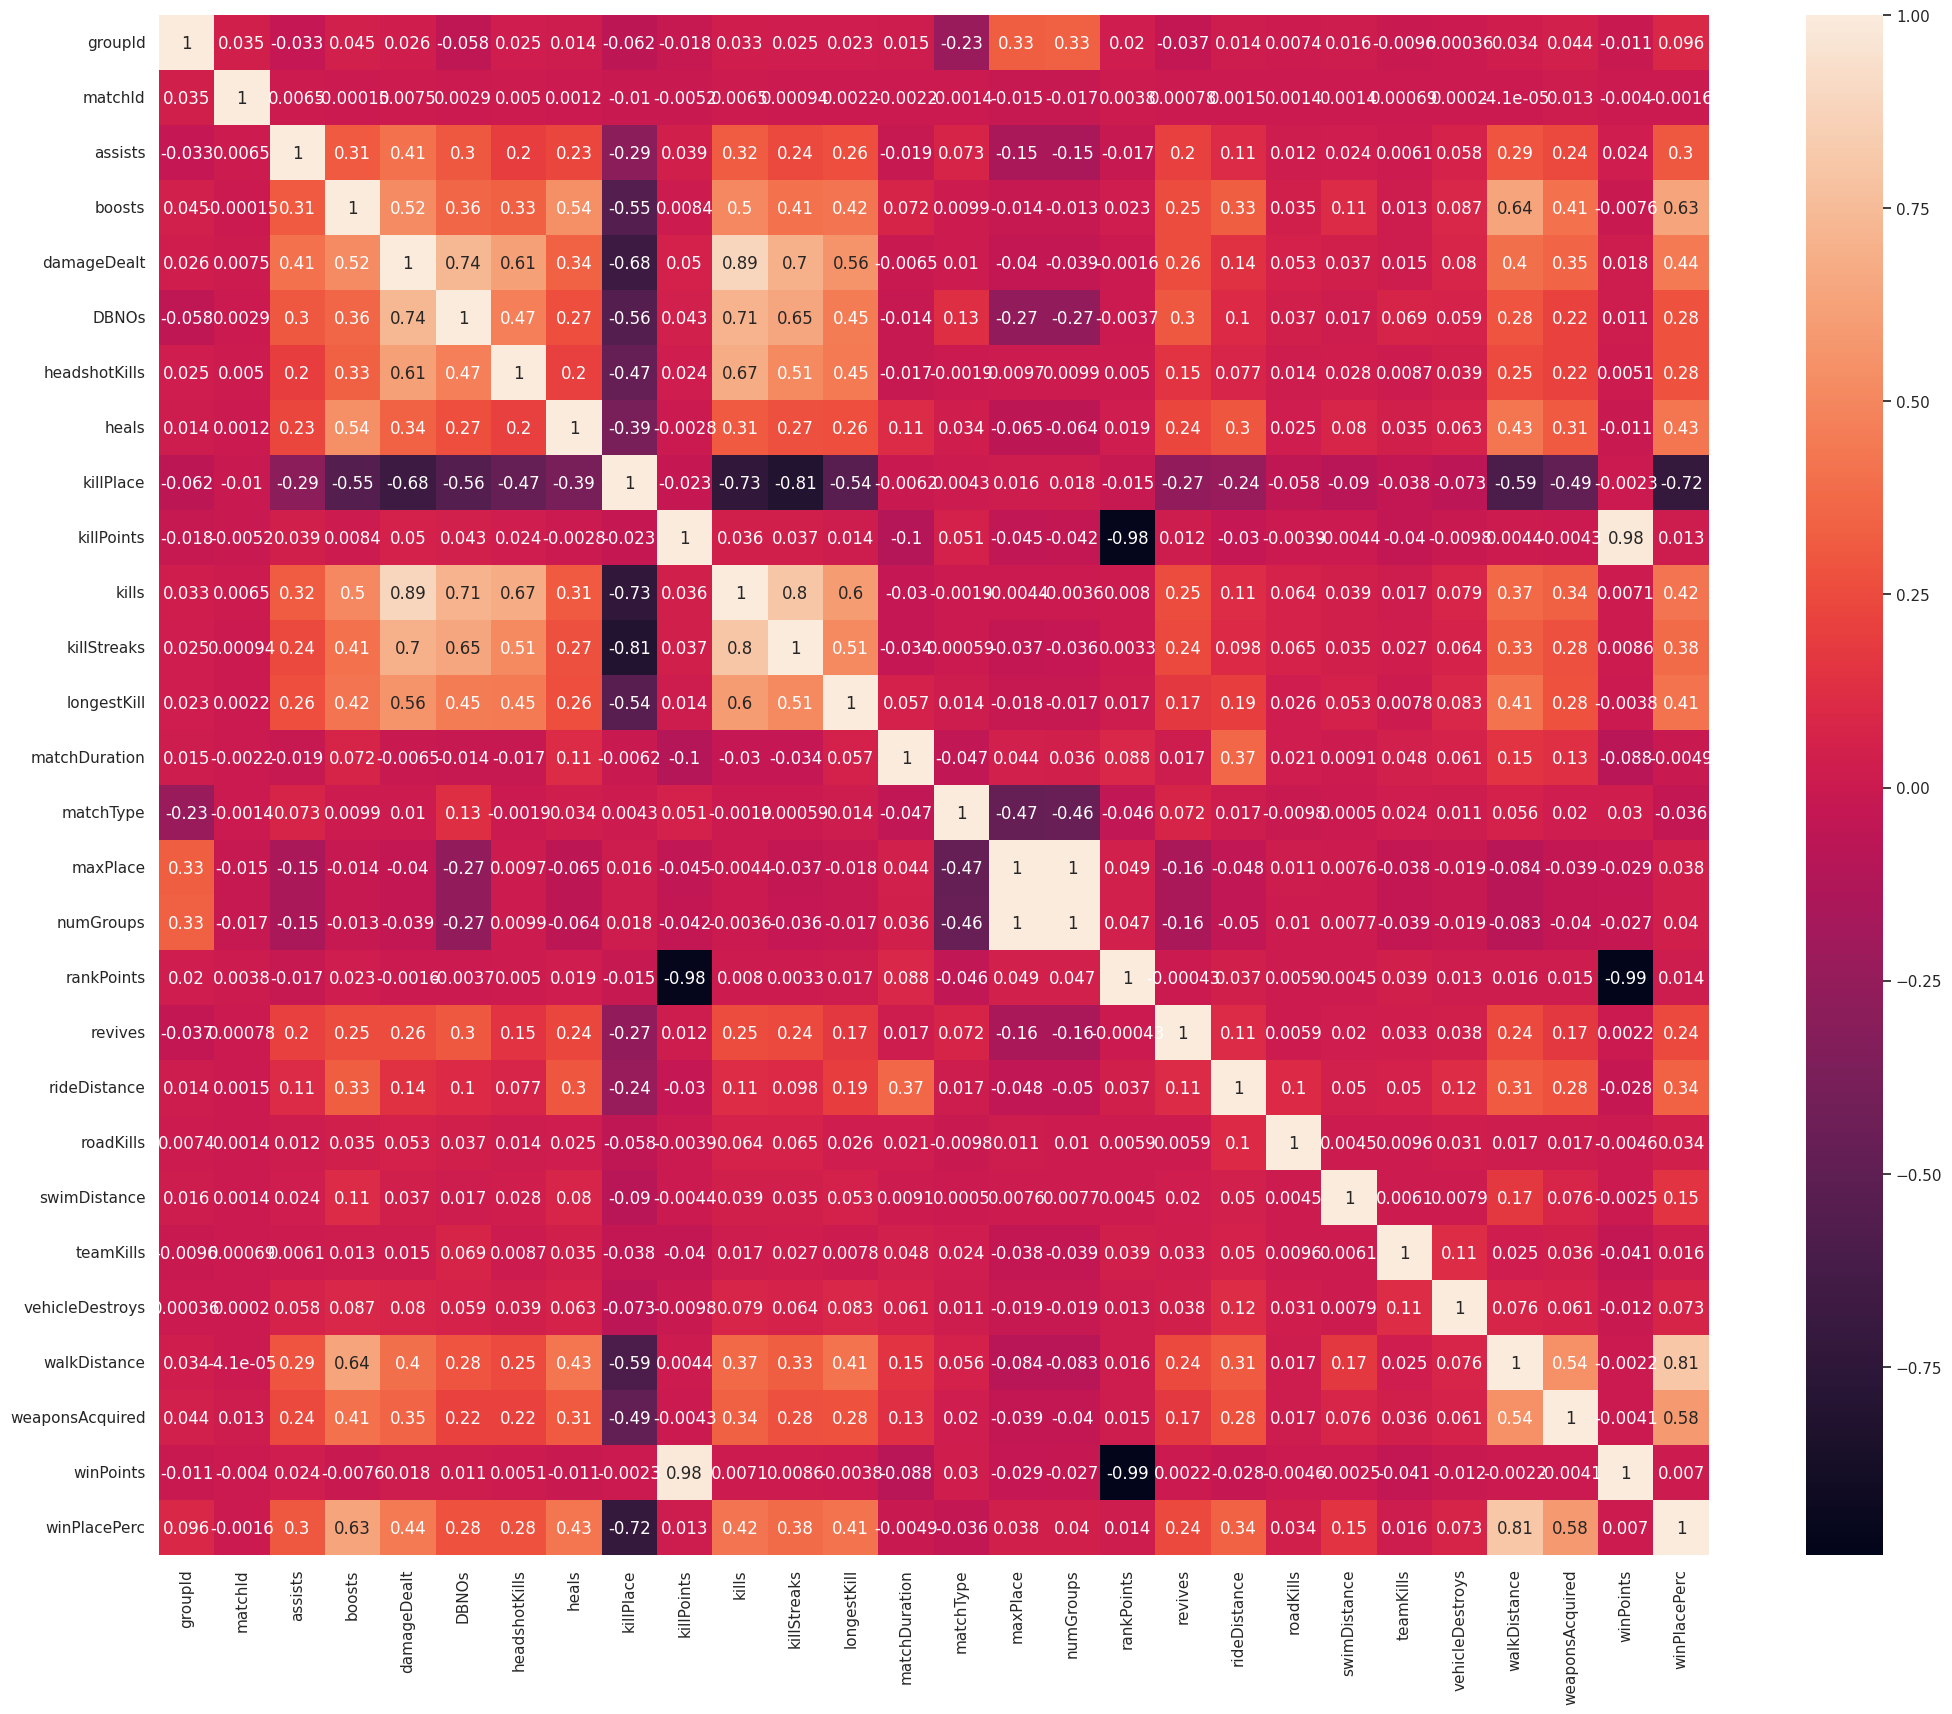

In [31]:
## Correlation matrix
plt.subplots(figsize=(25, 20))
sns.heatmap(train1.corr(), annot=True)

- We thought of reducing the dataset size by grouping the rows if they are a part of team, means a row will be a team now or an individual if its solo.
- So we have groupby the dataset by groupId and applied the aggregrate function to all the features with mean, max, min according to the feature.

- Like
    - Kills : we have taken sum of the kills of team , walkDistance : max,
    - if the columns values are same for all the team players like
    - winPlacePerc, matchType, teamKills, etc we can take mean or max as it will be same for all the players.

    - So basically the feature which desribe any teamwork we will take sum of it ( e.g kils, assists)
    - If its a scaling feature we are taking mean of it
    - If the feature describes quality of player in a team we'll take max of it hence his/her team is affected positively

In [32]:
train2 = train.copy()
train2 = train2.groupby(by=['groupId']).agg({'matchId':'max', 'assists':'sum', 'boosts':'sum','damageDealt':'sum', 'DBNOs':'sum',
                                            'headshotKills':'sum','heals':'sum', 'killPlace':'mean', 'killPoints':'max', 'kills':'sum',
                                            'killStreaks':'max','longestKill':'mean','matchDuration':'max', 'maxPlace':'mean','numGroups':'mean',
                                            'rankPoints' : 'max', 'matchType':'mean','revives':'sum','rideDistance':'max', 'roadKills':'sum',
                                            'swimDistance':'max','teamKills':'sum', 'vehicleDestroys':'sum', 'walkDistance':'max',
                                            'weaponsAcquired':'sum','winPoints':'max', 'winPlacePerc':'max'})



In [33]:
print("Memory Before :",(train1.memory_usage(index=True).sum()/(1024 * 1024)).round(2), " MB ")
print("Memory After : ", (train2.memory_usage(index=True).sum()/(1024 * 1024)).round(2), " MB ")

Memory Before : 247.67  MB 
Memory After :  187.74  MB 


- Here we have significantly reduced the dataset memory, but is it legit ? lets see some plots and figure out

<ipython-input-34-bc4ce98f0aa8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train2, ax=axes[i, j], x = train2[cont_dist[ind]], kde = True)
<ipython-input-34-bc4ce98f0aa8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train1, ax=axes[i, j], x = train1[cont_dist[ind]], kde = True)
<ipython

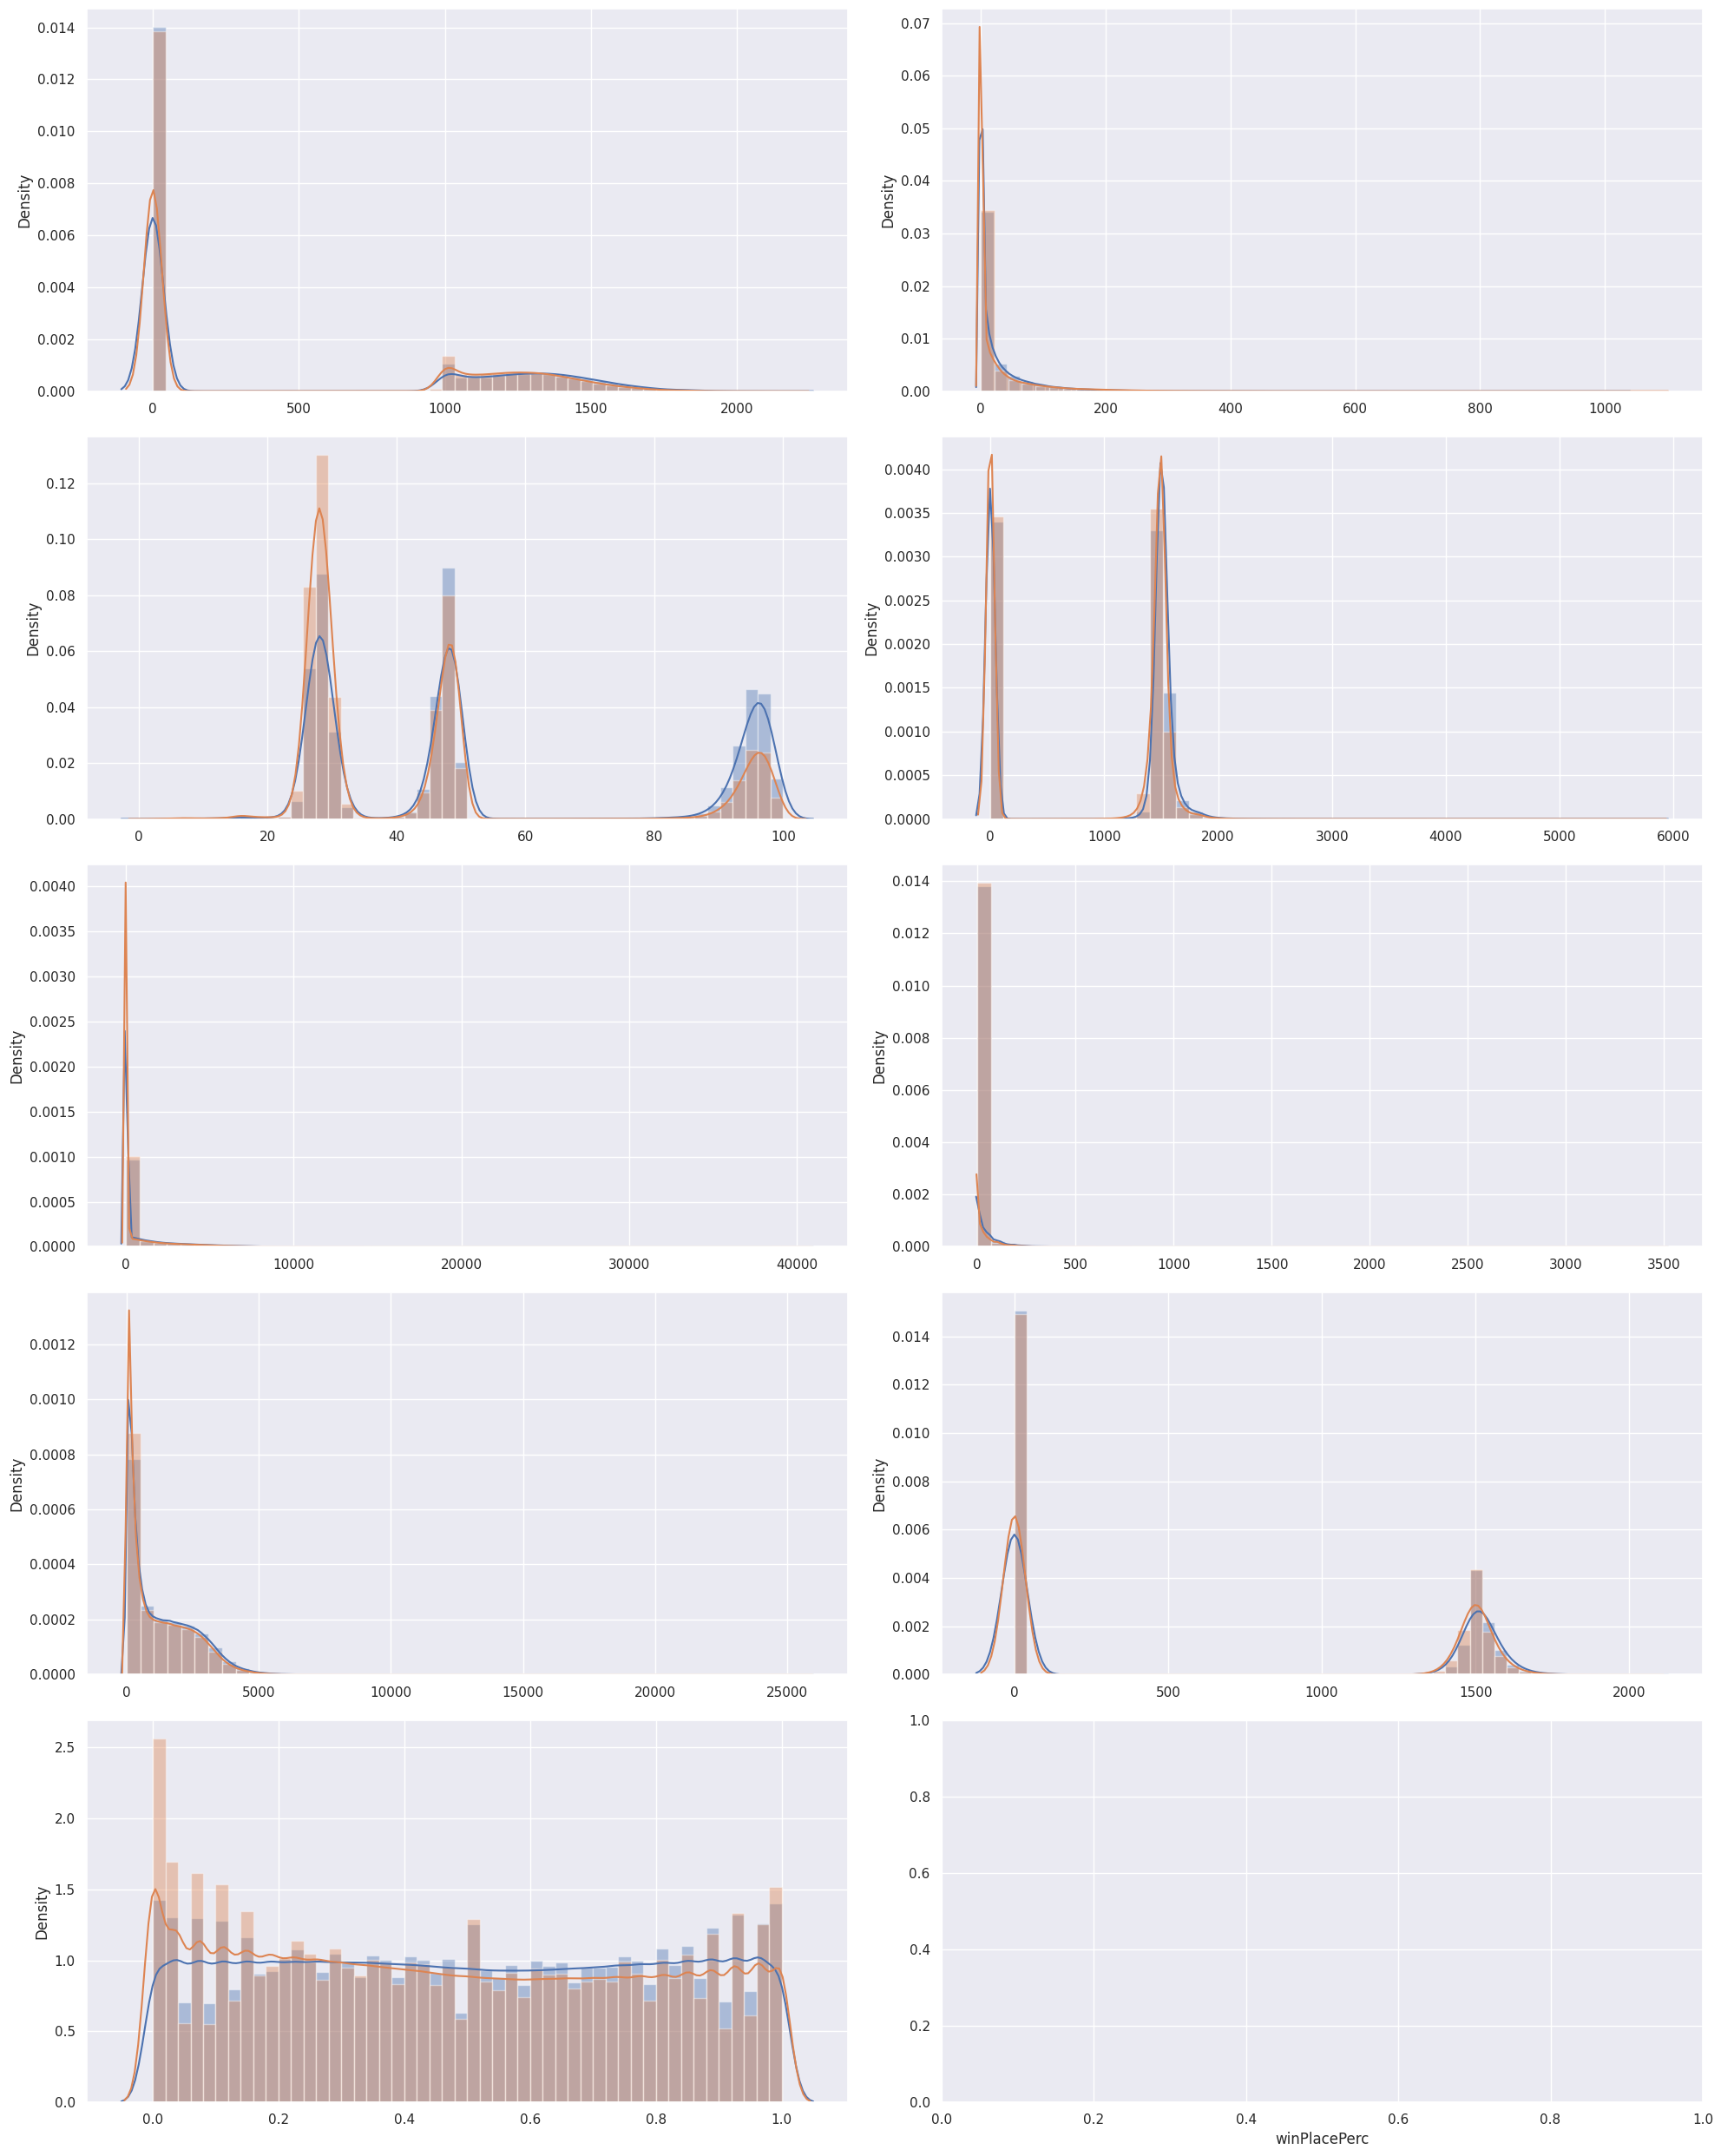

In [34]:

fig, axes = plt.subplots(5, 2, figsize=(20, 25))
ind = 0
for i in range(5):
    for j in range(2):
        sns.distplot(train2, ax=axes[i, j], x = train2[cont_dist[ind]], kde = True)
        sns.distplot(train1, ax=axes[i, j], x = train1[cont_dist[ind]], kde = True)
        plt.xlabel(cont_dist[ind])
        ind += 1
        if(ind == len(cont_dist)):
            break
plt.tight_layout()
plt.show()

- We have plotted density graph for the original dataset and the reduced dataset looks like the both distribution looks similar.
- Also lets check the correlation of all the features with winPlacePerc before and after

### Correlation Matrix

In [35]:
cor1 = pd.DataFrame()
cor1["Original Dataset"] = train1.corr()['winPlacePerc']
# Select only numeric columns for correlation calculation
cor1["Reduced Dataset"] = train2.select_dtypes(include=['number']).corr()['winPlacePerc']

print(cor1)

                 Original Dataset  Reduced Dataset
groupId                     0.096              NaN
matchId                    -0.002              NaN
assists                     0.299            0.288
boosts                      0.634            0.610
damageDealt                 0.440            0.403
DBNOs                       0.280            0.249
headshotKills               0.277            0.314
heals                       0.428            0.417
killPlace                  -0.719           -0.784
killPoints                  0.013            0.008
kills                       0.420            0.419
killStreaks                 0.377            0.371
longestKill                 0.410            0.467
matchDuration              -0.005            0.003
matchType                  -0.036            0.002
maxPlace                    0.038           -0.004
numGroups                   0.040           -0.004
rankPoints                  0.014            0.009
revives                     0.2

- Hence from the above result there is not much of difference of correlation of feature wih winPlacePerc too
- So going forward the reduced dataset can be a candidate for the training purpose

Text(0, 0.5, 'Boosts')

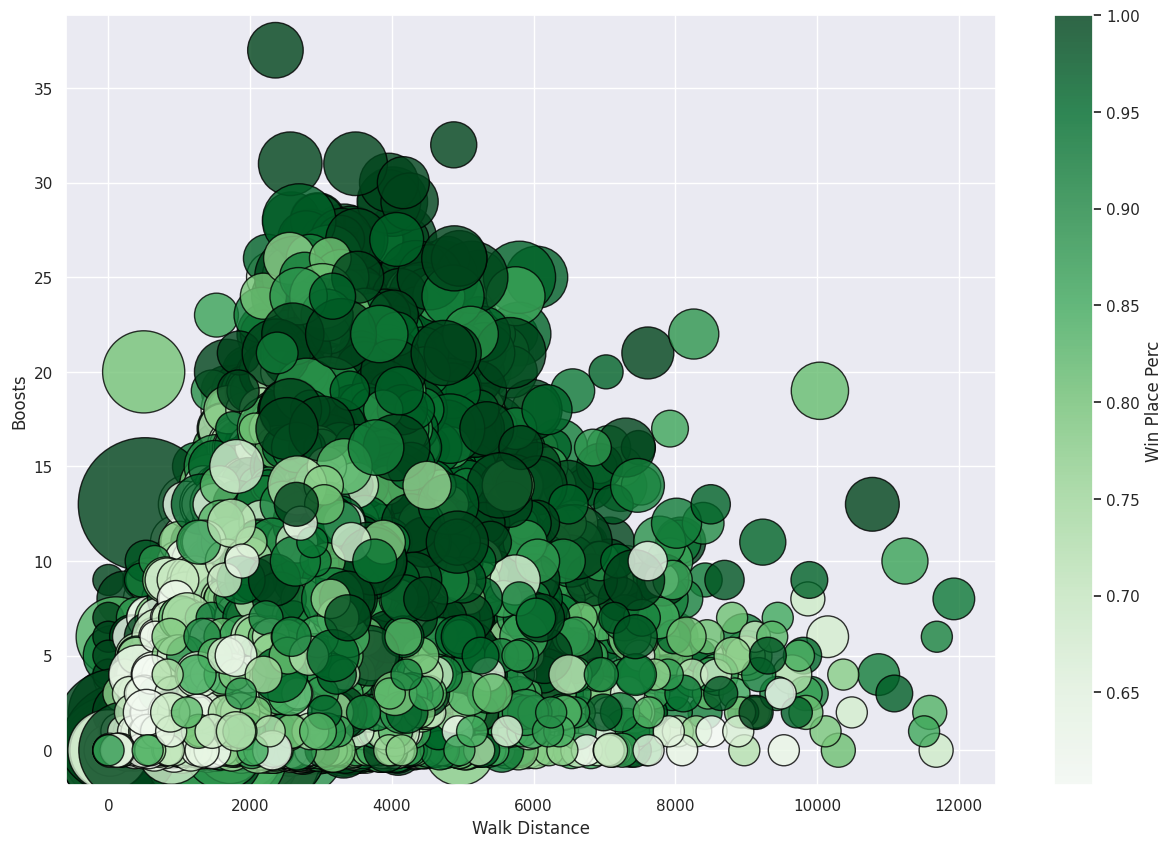

In [36]:
temp1 = train2[train2['winPlacePerc']>0.6].sample(100000)
plt.figure(figsize=(15, 10))
plt.scatter(temp1['walkDistance'], temp1['boosts'], s=(temp1['kills']+5)*100, c=temp1['winPlacePerc'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
cbar = plt.colorbar()
cbar.set_label("Win Place Perc")
plt.xlabel("Walk Distance")
plt.ylabel("Boosts")

### From the above graph we can observe that as boosts consumption increases players chance to win the match increases, also logically a player which has high chance of winning tends to be in fight and needs boost also we can see walkDistance also matters in winnning as it will be high for the player/team who has high chances of winning, because to be in the game players have to be in safe zone for that they need to travel.

Text(0, 0.5, 'Boosts')

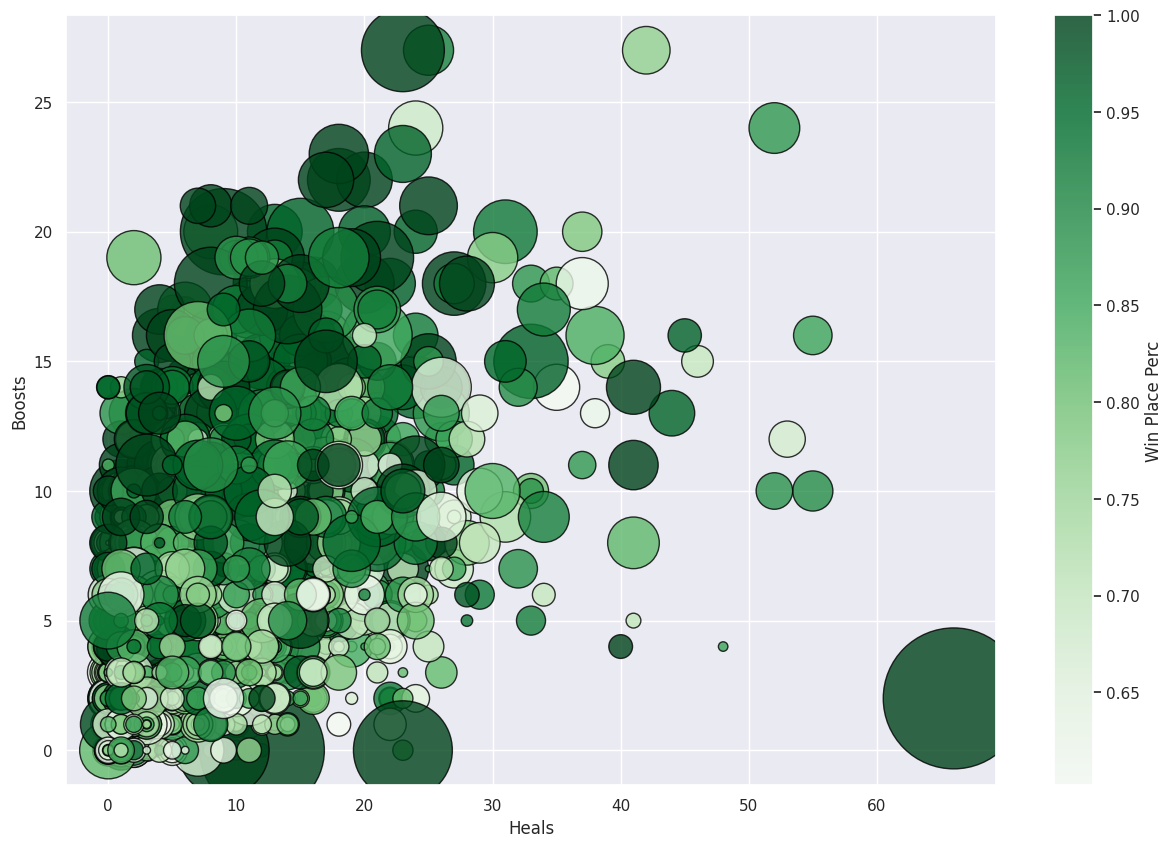

In [37]:
temp1 = train2[train2['winPlacePerc']>0.6].sample(5000)
plt.figure(figsize=(15, 10))
plt.scatter(temp1['heals'], temp1['boosts'], s=temp1['damageDealt'], c=temp1['winPlacePerc'], cmap='Greens', edgecolor='black', linewidth=1, alpha=0.8)
cbar = plt.colorbar()
cbar.set_label("Win Place Perc")
plt.xlabel("Heals")
plt.ylabel("Boosts")

<ipython-input-38-d674c97f768a>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


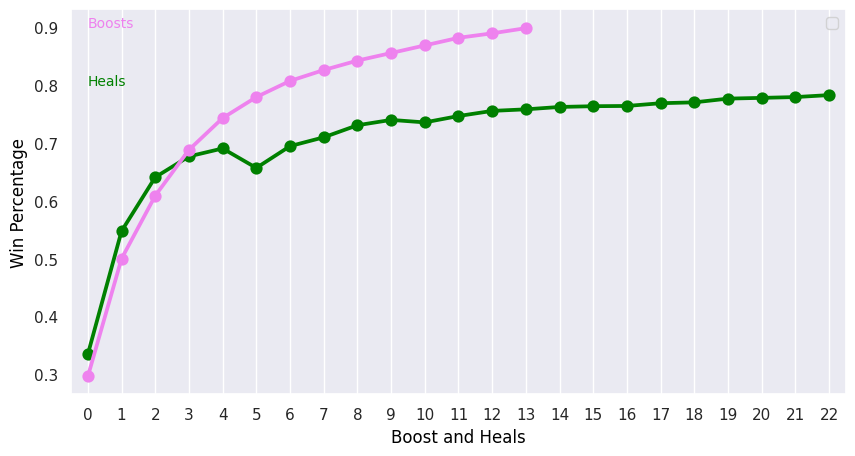

In [38]:
temp2 = train2[train2['heals'] < train2['heals'].quantile(0.99)]
temp2 = temp2[temp2['boosts'] < temp2['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='heals',y='winPlacePerc',data=temp2,color='green')
sns.pointplot(x='boosts',y='winPlacePerc',data=temp2,color='violet')
plt.text(0,0.8,'Heals',color='green',fontsize = 10)
plt.text(0,0.9,'Boosts',color='violet',fontsize = 10)
plt.ylabel('Win Percentage', color='black')
plt.xlabel('Boost and Heals', color='black')
plt.grid()
plt.legend()

### From the above graph we can see Boosts and Heals shows positive relation with winPlacePerc, Boosts shows more than Heal. Maybe we can do some stuff with both of these feature later

<Axes: xlabel='kills', ylabel='winPlacePerc'>

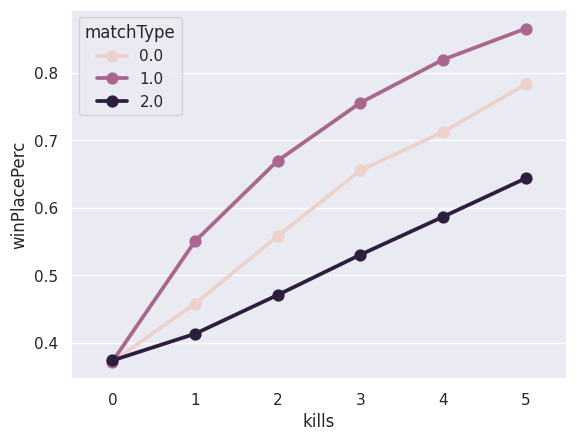

In [39]:
temp = train2[train2['kills'] <= train2['kills'].quantile(.9)]
sns.pointplot(x='kills',y='winPlacePerc',data=temp, hue='matchType')

# duo   - 0
# solo  - 1
# squad - 2

### From the above graph we can say that as the number of kills increases chances of winning increases but it does not matter much as we go from match type from solo to squad, because in squad we have to play more strategically and focus is not much on kills in squad

### While Analyzing the dataset we found some irregularities in the data, so handling those anomalies now

In [40]:
train4 = train2.copy()

### 1) Have done kills but have not travel any distance

<Axes: xlabel='kills', ylabel='count'>

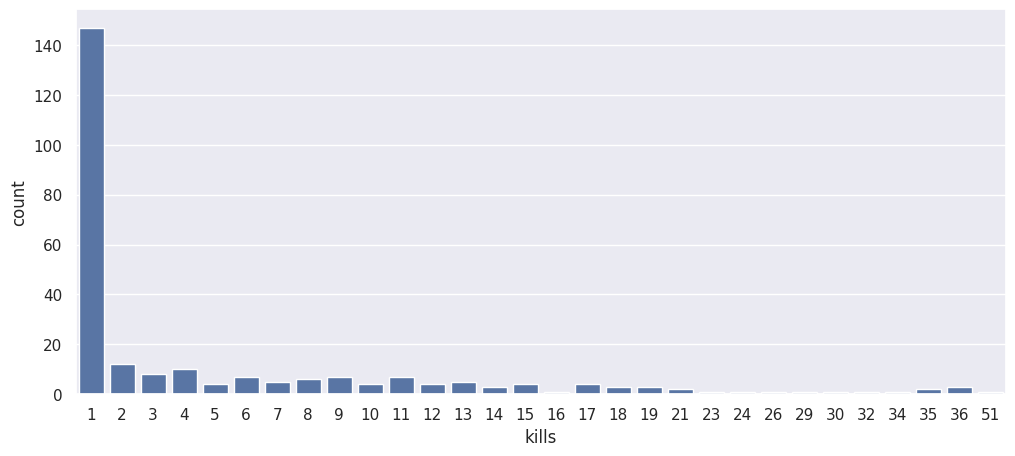

In [41]:
plt.figure(figsize=(12, 5))
sns.countplot(x='kills', data=train4[(train4['walkDistance'] + train4['rideDistance'] + train4['swimDistance']==0) & (train4['kills'] > 0)])

### So the above graph is of the players who travel zero distance yet they have killed enemies seems suspicious, hence removing those rows!!

In [42]:
train4.drop(train4[(train4['walkDistance'] + train4['rideDistance'] + train4['swimDistance']==0) & (train4['kills'] > 0)].index, axis=0, inplace = True)

### 2)

<Axes: xlabel='kills', ylabel='count'>

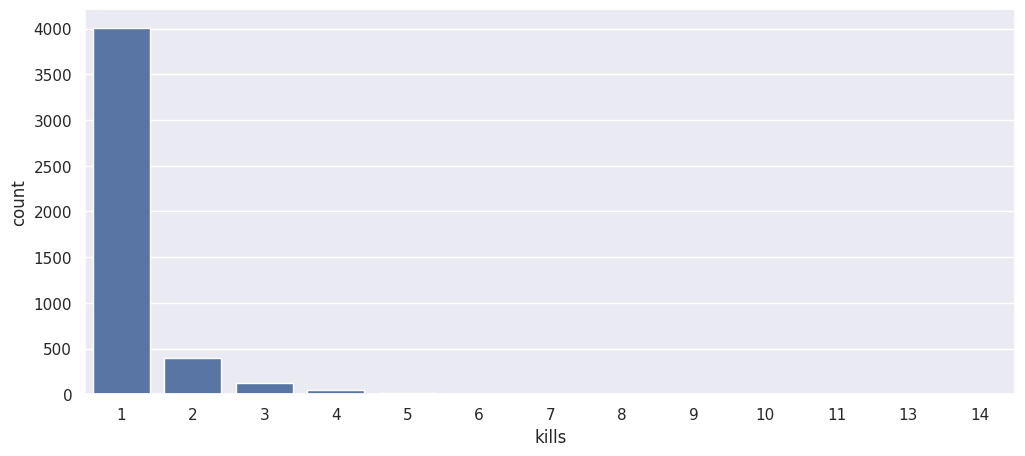

In [43]:
plt.figure(figsize=(12, 5))
sns.countplot(x='kills', data=train4[(train4['longestKill']==0) & (train4['kills'] > 0)])

### So here we can see the longest kill is zero yet there are some non-zero kills, hence dropping those rows too!

In [44]:
index_drop = train4[(train4['longestKill']==0) & (train4['kills'] > 0)].index
train4.drop(index_drop,axis= 0,inplace= True)

### 3)

<Axes: xlabel='teamKills', ylabel='count'>

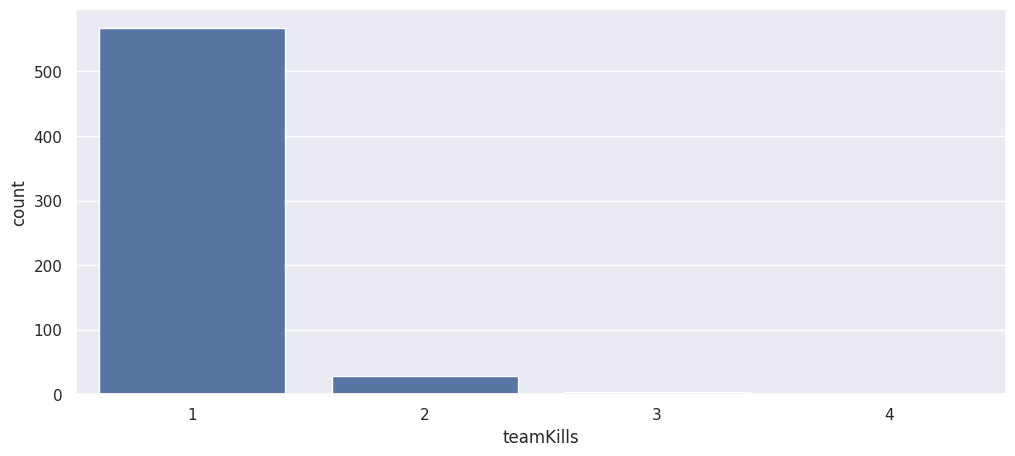

In [45]:
plt.figure(figsize=(12, 5))
sns.countplot(x='teamKills', data=train4[(train4['weaponsAcquired']==0) & (train4['teamKills']>0) & (train4['rideDistance']==0)])

### In pubg, a player can kill his/her team-mate only if he has grenade(weapon) or he/she has drove a vehicle over his/her team-mate. But from the above condition graph there are some players who have killed teamplayer yet they have not acquire any weapon or drove a car/vehicle!!

In [46]:
index_drop = train4[(train4['weaponsAcquired']==0) & (train4['teamKills']>0) & (train4['rideDistance']==0)].index
train4.drop(index_drop, axis=0, inplace = True)
print(len(index_drop), " rows dropped!!")

601  rows dropped!!


### 4)

<Axes: xlabel='roadKills', ylabel='count'>

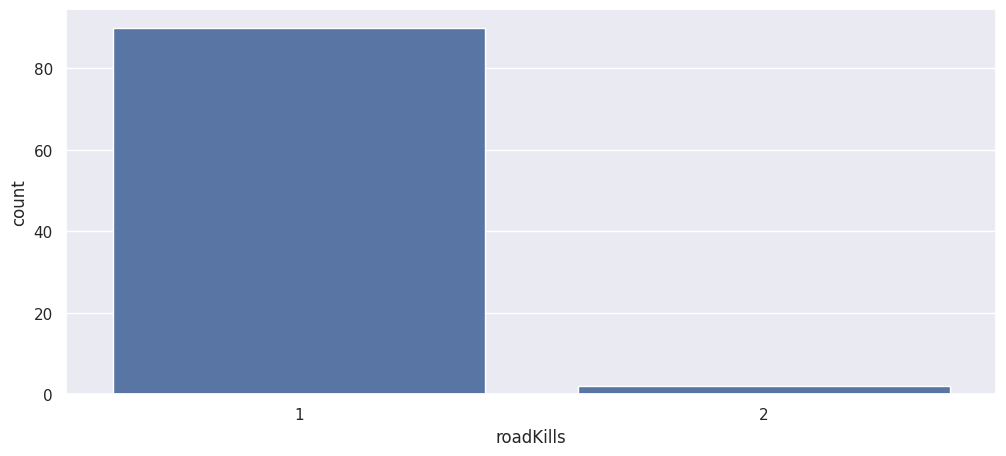

In [47]:
plt.figure(figsize=(12, 5))
sns.countplot(x='roadKills', data=train4[(train4['roadKills']>0) & (train4['rideDistance']==0)])

### Killing players  from the car but have not ride the car=> illegal data

In [48]:
index_drop = train4[(train4['roadKills']>0) & (train4['rideDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(92,)


### 5) Have not walked but have consumed heals and boost, its not possible

In [49]:
index_drop = train4[((train4['heals']>0) | (train4['boosts']>0)) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(156,)


### Similarly we have observed some more anamolies like as below:

### 6) Its not possible to acquire weapon if a player has not walked a distamce

In [50]:
index_drop = train4[(train4['weaponsAcquired']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(5512,)


### 7) If matchType is solo then there cannot be any assists value, because to assist we need teammate which we don't have, here as the number are somewhat high, so instead of dropping the rows, we imputed that feature with 0.

In [51]:
index_replace = train4[(train4['matchType']==1) & (train4['assists']>0)].index
print(index_replace.shape)
train4.loc[index_replace,'assists'] = 0

(31659,)


### 8) A player cannot assist a teammate if the walkDistance is 0

In [52]:
index_drop = train4[(train4['assists']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(13,)


### 9) A player cannot dealt damage if he has not walked a single meter

In [53]:
index_drop = train4[(train4['damageDealt']>0) & (train4['walkDistance']==0)].index
print(index_drop.shape)
train4.drop(index_drop, axis=0, inplace = True)

(735,)


### Correlation Matrix

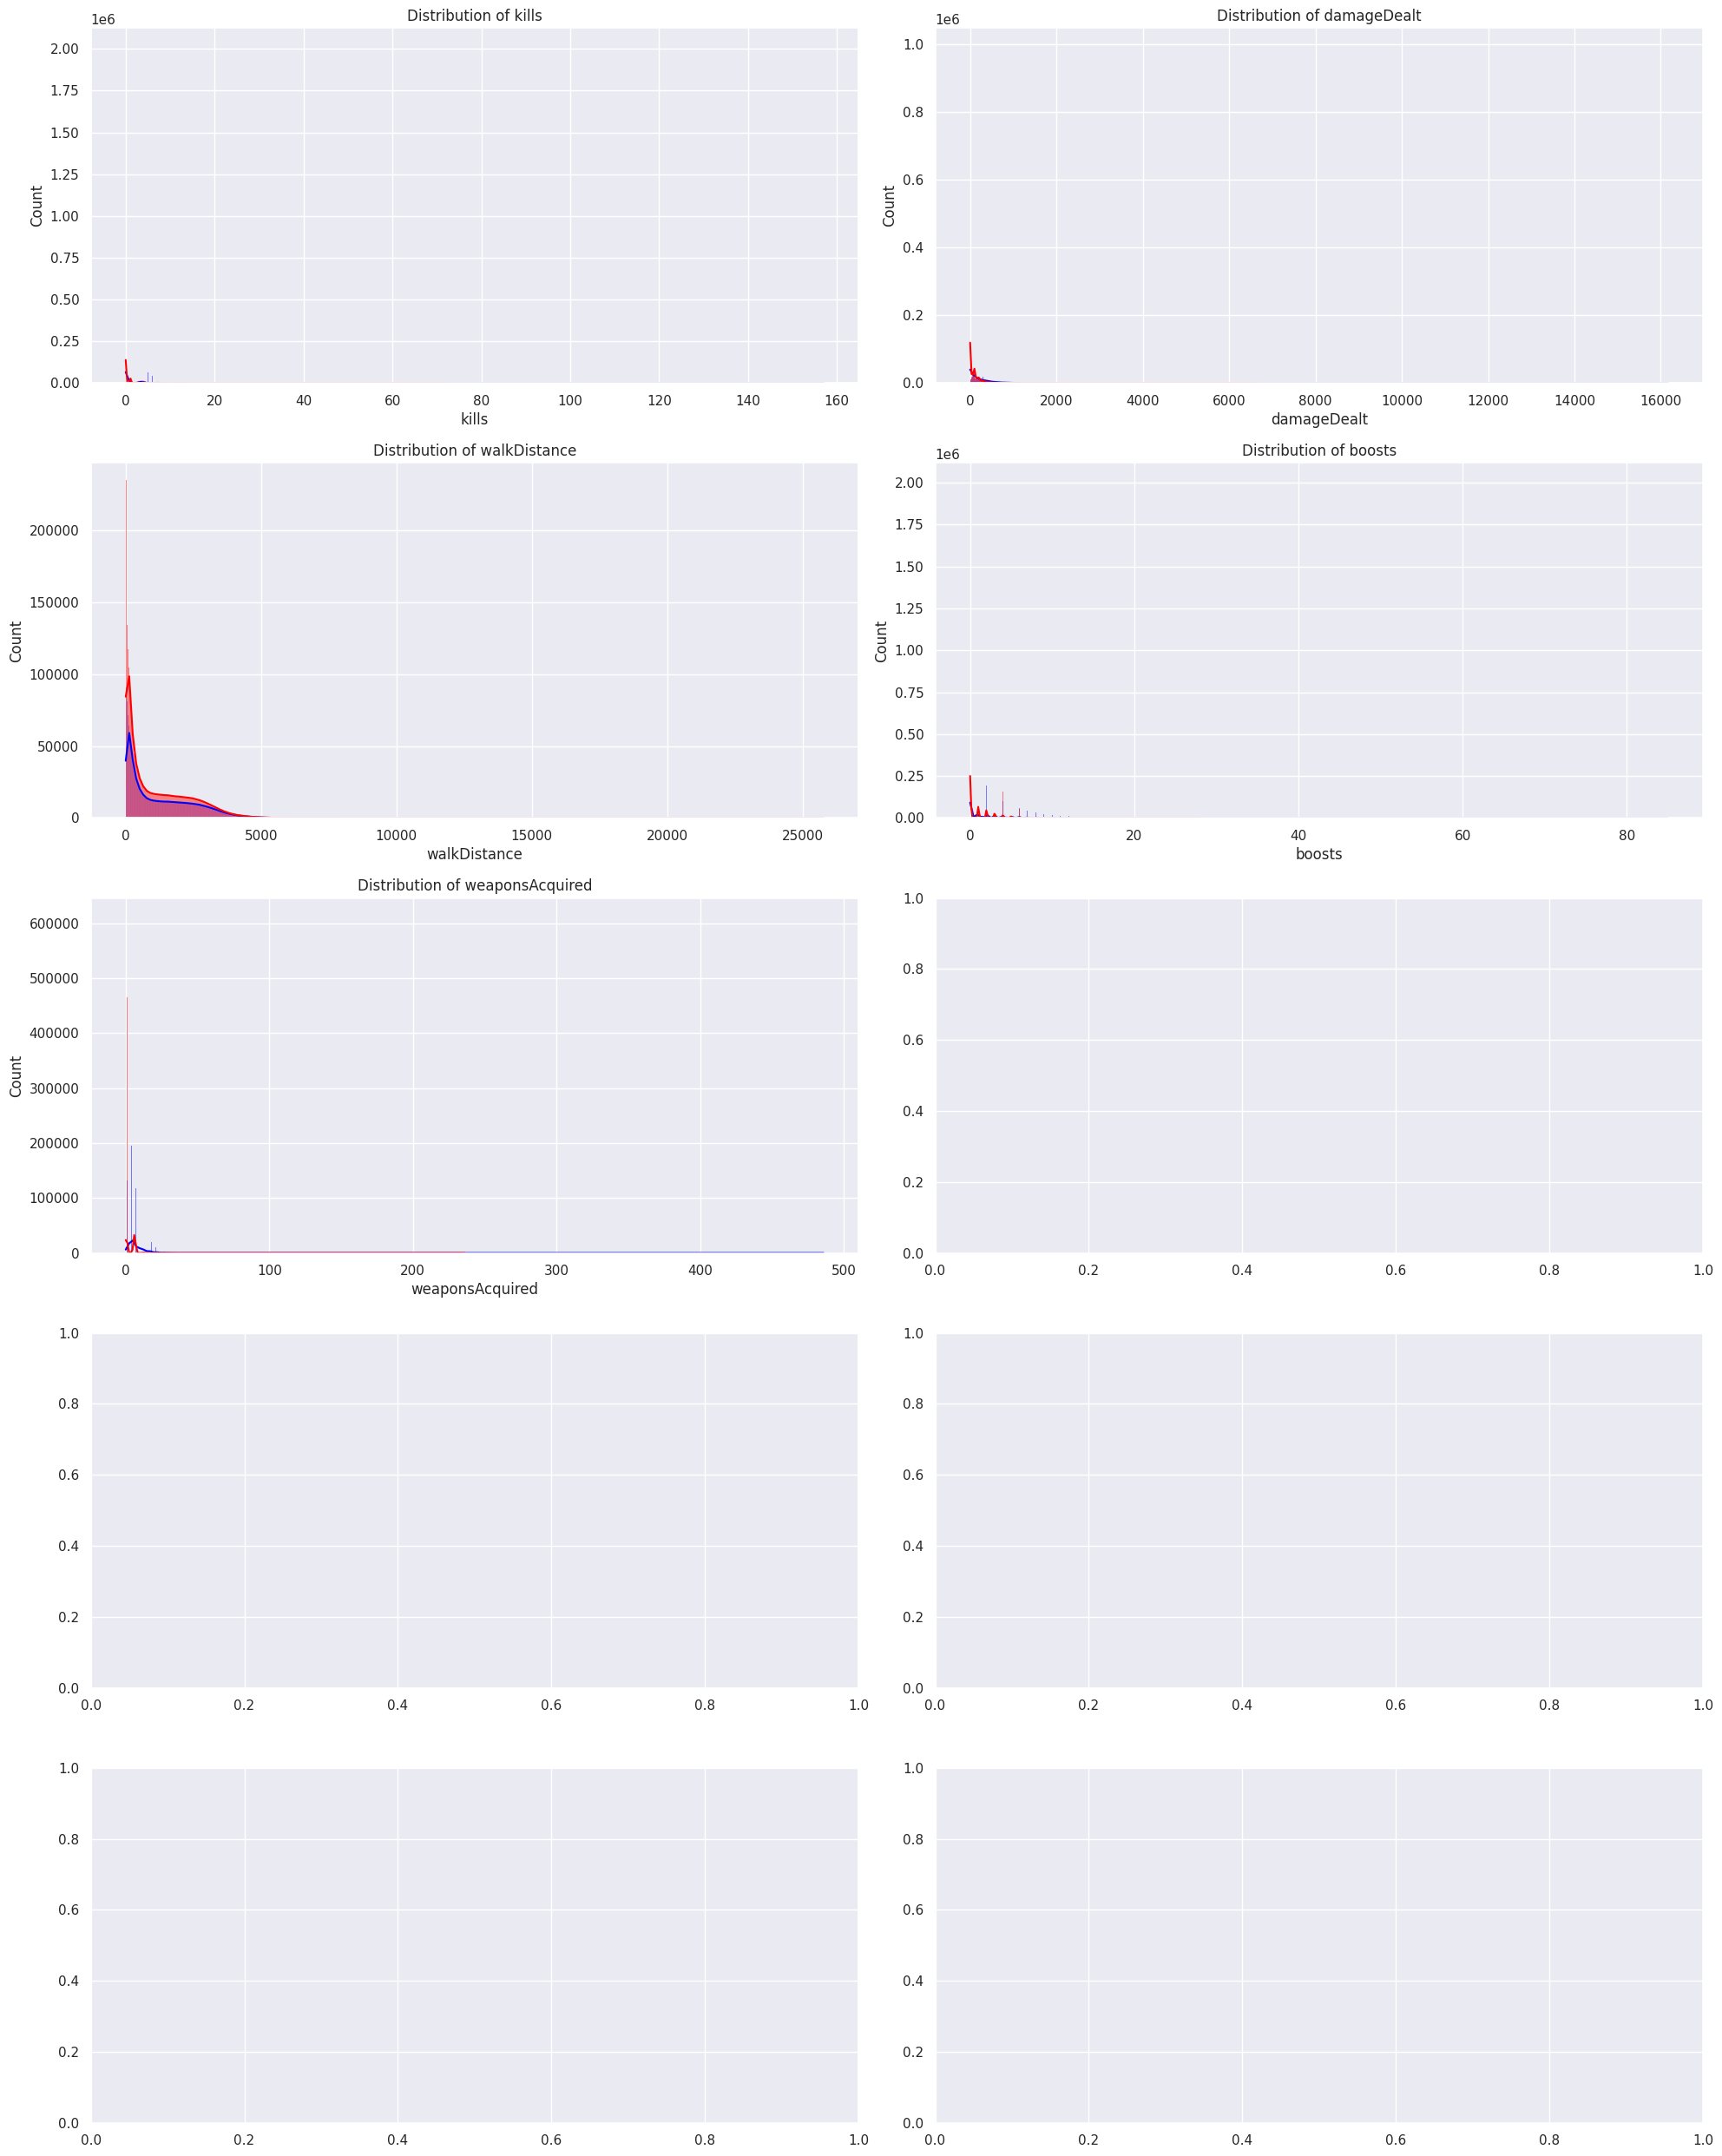

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define continuous features list with your actual column names from train1 and train2
cont_dist = ['kills', 'damageDealt', 'walkDistance', 'boosts', 'weaponsAcquired']

fig, axes = plt.subplots(5, 2, figsize=(20, 25))
ind = 0
for i in range(5):
    for j in range(2):
        if ind >= len(cont_dist):  # Stop when all variables are plotted
            break

        sns.histplot(train2[cont_dist[ind]], ax=axes[i, j], kde=True, color='blue', label='train2', alpha=0.5)
        sns.histplot(train1[cont_dist[ind]], ax=axes[i, j], kde=True, color='red', label='train1', alpha=0.5)

        axes[i, j].set_xlabel(cont_dist[ind])  # Set x-axis label
        axes[i, j].set_title(f"Distribution of {cont_dist[ind]}")
        ind += 1

    if ind >= len(cont_dist):  # Break outer loop as well
        break

plt.tight_layout()
plt.show()

In [55]:
def getCorrelatedFeatures(corrdata, threshold):
    train_features = []
    train_value = []
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            train_features.append(index)
            train_value.append(corrdata[index])

    df = pd.DataFrame(data = train_value, index = train_features,columns = ['CorrValue'] )
    return df,train_features

In [56]:
# Convert specific columns to numeric before calculating correlation
numeric_cols = train4.select_dtypes(include=np.number).columns
train4[numeric_cols] = train4[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Now you can calculate correlation, filtering for numeric columns:
threshold = 0.4
corr_value, train_features = getCorrelatedFeatures(train4[numeric_cols].corr()['winPlacePerc'], threshold)
print(corr_value)

              CorrValue
boosts            0.611
damageDealt       0.403
heals             0.416
killPlace        -0.783
kills             0.418
longestKill       0.467
walkDistance      0.815
winPlacePerc      1.000


In [57]:
train4 = train4.reset_index()

In [58]:
# train4.to_csv("Train-GroupByGroupId-RemovedRows.csv", index=False)

In [59]:
for column_name in train4:
    if train4[column_name].dtype=='float64':
        train4[column_name] = pd.to_numeric(train4[column_name], downcast= 'float')
    if train4[column_name].dtype=='int64':
        train4[column_name] = pd.to_numeric(train4[column_name],downcast='integer')

### Feature Engineering

In [60]:
train5 = train4.copy()

In [61]:
def feature_engineering(train5):
    train5.insert(train5.shape[1]-1, 'killsPerMeter', train5['kills']/train5['walkDistance'])
    train5['killsPerMeter'].fillna(0, inplace=True)
    train5['killsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'healsPerMeter', train5['heals']/train5['walkDistance'])
    train5['healsPerMeter'].fillna(0, inplace=True)
    train5['healsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalHeals', train5['heals']+train5['boosts'])

    train5.insert(train5.shape[1]-1, 'totalHealsPerMeter', train5['totalHeals']/train5['walkDistance'])
    train5['totalHealsPerMeter'].fillna(0, inplace=True)
    train5['totalHealsPerMeter'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'totalDistance', train5['walkDistance']+train5['rideDistance']+train5['swimDistance'])
    train5['totalDistance'].fillna(0, inplace=True)
    train5['totalDistance'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'headshotRate', train5['headshotKills']/train5['kills'])
    train5['headshotRate'].fillna(0, inplace=True)
    train5['headshotRate'].replace(np.inf, 0, inplace=True)

    train5.insert(train5.shape[1]-1, 'assistsAndRevives', train5['assists']+train5['revives'])

    train5.insert(train5.shape[1]-1, 'itemsAcquired', train5['heals']+train5['boosts']+train5['weaponsAcquired'])

    return train5

In [62]:
train5 = feature_engineering(train5)

In [63]:
# Convert columns containing strings to numbers before calculating correlation
for col in ['groupId', 'matchId']:
    if train5[col].dtype == 'object':
        train5[col] = train5[col].astype(str).str.replace(r'\D', '', regex=True).astype(float)

# Calculate correlation, optionally filtering for numeric columns
numeric_cols = train5.select_dtypes(include=np.number).columns
corr_matrix = train5[numeric_cols].corr()

# Access winPlacePerc correlation
winPlacePerc_corr = corr_matrix['winPlacePerc']
print(winPlacePerc_corr)

groupId              -0.001
matchId               0.000
assists               0.279
boosts                0.611
damageDealt           0.403
DBNOs                 0.247
headshotKills         0.313
heals                 0.416
killPlace            -0.783
killPoints            0.007
kills                 0.418
killStreaks           0.369
longestKill           0.467
matchDuration         0.001
maxPlace              0.002
numGroups             0.002
rankPoints            0.010
matchType             0.002
revives               0.256
rideDistance          0.337
roadKills             0.043
swimDistance          0.162
teamKills             0.006
vehicleDestroys       0.091
walkDistance          0.815
weaponsAcquired       0.367
winPoints             0.005
killsPerMeter        -0.105
healsPerMeter         0.048
totalHeals            0.538
totalHealsPerMeter    0.044
totalDistance         0.660
headshotRate          0.169
assistsAndRevives     0.316
itemsAcquired         0.524
winPlacePerc        

In [64]:
# train5.to_csv("Train-GroupByGroupId-RemovedRows-FeatureEng.csv", index=False)


In [65]:
# train5 = pd.read_csv("../input/Train-GroupByGroupId-RemovedRows-FeatureEng/Train-GroupByGroupId-RemovedRows-FeatureEng.csv")

<h1> <b>Reformatting test data  </b></h1>

In [66]:

from google.colab import drive
drive.mount('/content/drive')  # Mount your Google Drive
file_path = "/content/drive/My Drive/pubg.csv"
test = pd.read_csv(file_path)

for column_name in test:
    if test[column_name].dtype=='float64':
        test[column_name] = pd.to_numeric(test[column_name], downcast= 'float')
    if test[column_name].dtype=='int64':
        test[column_name] = pd.to_numeric(test[column_name],downcast='integer')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['matchType'] = test['matchType'].apply(lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad')
test['matchType'] = labelencoder.fit_transform(test['matchType'])
test['matchType'].value_counts()

matchType
2    2403625
0    1322628
1     720713
Name: count, dtype: int64

In [68]:
mapping = dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))
mapping

{'duo': 0, 'solo': 1, 'squad': 2}

In [69]:
test1 = test.groupby(by=['groupId']).agg({'matchId':'max', 'assists':'sum', 'boosts':'sum','damageDealt':'sum', 'DBNOs':'sum',
                                            'headshotKills':'sum','heals':'sum', 'killPlace':'mean', 'killPoints':'max', 'kills':'sum',
                                            'killStreaks':'max','longestKill':'mean','matchDuration':'max', 'maxPlace':'mean','numGroups':'mean',
                                            'rankPoints' : 'max', 'matchType':'mean','revives':'sum','rideDistance':'max', 'roadKills':'sum',
                                            'swimDistance':'max','teamKills':'sum', 'vehicleDestroys':'sum', 'walkDistance':'max',
                                            'weaponsAcquired':'sum','winPoints':'max'})


In [70]:
test1 = test1.reset_index()

In [71]:
# test1.to_csv("Test-GroupByGroupId.csv", index=False)
# test1 = pd.read_csv("../input/Test-GroupByGroupId/Test-GroupByGroupId.csv")

In [72]:
test2 = test1.copy()

def fea_eng_test(test2):
    test2.insert(test2.shape[1], 'killsPerMeter', test2['kills']/test2['walkDistance'])
    test2['killsPerMeter'].fillna(0, inplace=True)
    test2['killsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'healsPerMeter', test2['heals']/test2['walkDistance'])
    test2['healsPerMeter'].fillna(0, inplace=True)
    test2['healsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'totalHeals', test2['heals']+test2['boosts'])

    test2.insert(test2.shape[1], 'totalHealsPerMeter', test2['totalHeals']/test2['walkDistance'])
    test2['totalHealsPerMeter'].fillna(0, inplace=True)
    test2['totalHealsPerMeter'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'totalDistance', test2['walkDistance']+test2['rideDistance']+test2['swimDistance'])
    test2['totalDistance'].fillna(0, inplace=True)
    test2['totalDistance'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'headshotRate', test2['headshotKills']/test2['kills'])
    test2['headshotRate'].fillna(0, inplace=True)
    test2['headshotRate'].replace(np.inf, 0, inplace=True)

    test2.insert(test2.shape[1], 'assistsAndRevives', test2['assists']+test2['revives'])

    test2.insert(test2.shape[1], 'itemsAcquired', test2['heals']+test2['boosts']+test2['weaponsAcquired'])

    return test2

In [73]:
test2 = fea_eng_test(test2)

In [74]:
# test2.to_csv("Test-GroupByGroupId-FeatureEng.csv", index=False)

# test2  = pd.read_csv("../input/Test-GroupByGroupId-FeatureEng/Test-GroupByGroupId-FeatureEng.csv")

# LightGBM Model

In [75]:
X = train5.drop(['groupId', 'matchId', 'winPlacePerc'], axis=1)
y = train5['winPlacePerc']

In [76]:
def model_train(model,Xt_train,Xt_test,yt_train, yt_test):
    model.fit(Xt_train,yt_train)
    score= model.score(Xt_train,yt_train)
    y_pred = model.predict(Xt_test)
    mse = mean_squared_error(yt_test, y_pred)
    print("MSE: {0:.6f}".format(mse))
    print("Training Score:{0:.6f}".format(score))

In [77]:
lgbm_for_reg= LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=30,
              min_split_gain=0.00015, n_estimators=250, num_leaves=2200,reg_alpha=0.1, reg_lambda=0.001, subsample=0.8,
              subsample_for_bin=45000, n_jobs =-1, max_bin =700, num_iterations=5100, min_data_in_bin = 12)

## LightGBM Train Model

In [80]:
import lightgbm as lgb

# ... (your existing code) ...

# Reduce num_iterations, num_leaves, and other parameters even further
lgbm_for_reg = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_depth=10, # Further reduction
              min_split_gain=0.00015, n_estimators=100, num_leaves=100, reg_alpha=0.1, # Further reduction
              reg_lambda=0.001, subsample=0.8,  # or bagging_fraction
              subsample_for_bin=45000, n_jobs=-1, max_bin=700, num_iterations=10, # Further reduction
              min_data_in_bin=12)

# ... (your existing code) ...

# Create the early stopping callback
early_stopping_callback = lgb.early_stopping(stopping_rounds=10)

# Fit the model with the callbacks
lgbm_for_reg.fit(X, y,
                 eval_set=[(X, y)],
                 callbacks=[log_evaluation(period=1700), early_stopping_callback])

/usr/local/lib/python3.11/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Using too small ``bin_construct_sample_cnt`` may encounter unexpected errors and poor accuracy.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.069128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9385
[LightGBM] [Info] Number of data points in the train set: 1827864, number of used features: 33
[LightGBM] [Info] Start training from score 0.500762
	[0]	[('training', 'l2', 0.0841165107206517, False)]


/usr/local/lib/python3.11/dist-packages/lightgbm/callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")


LGBMRegressor(colsample_bytree=0.8, learning_rate=0.03, max_bin=700,
              max_depth=10, min_data_in_bin=12, min_split_gain=0.00015,
              n_jobs=-1, num_iterations=10, num_leaves=100, reg_alpha=0.1,
              reg_lambda=0.001, subsample=0.8, subsample_for_bin=45000)

## Importanat Parameter

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

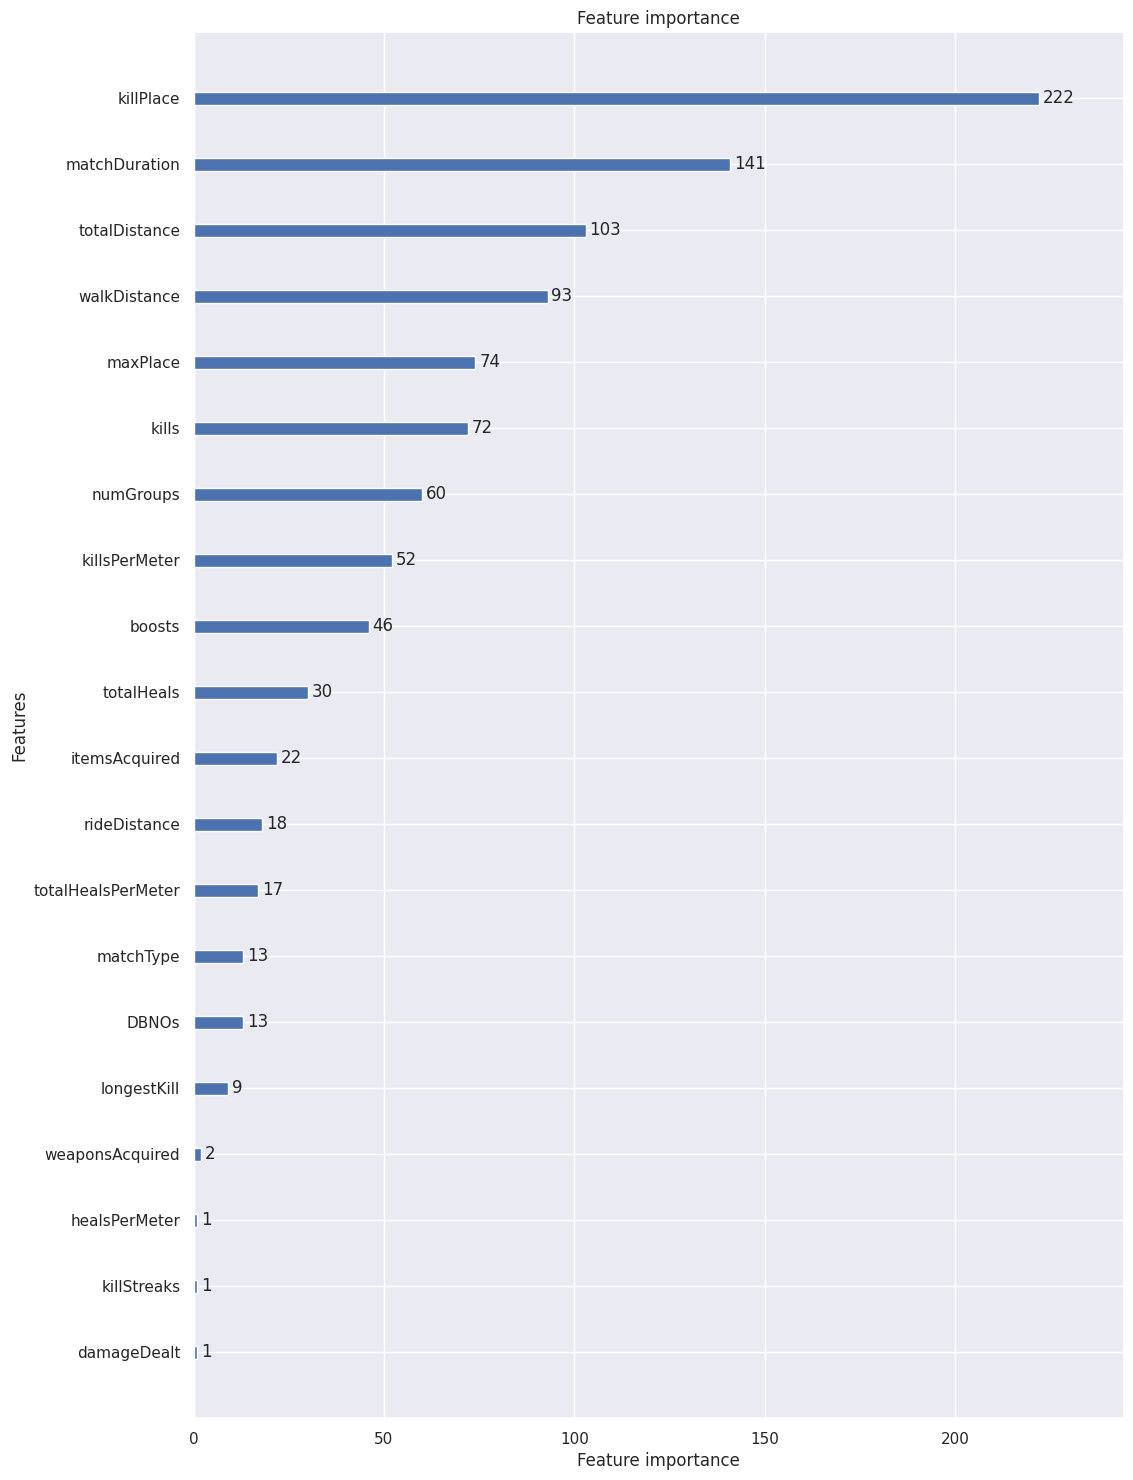

In [81]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(lgbm_for_reg, max_num_features=50,ax=ax)

## Pridiction of Test dataset

In [82]:
test2 = test2.drop(['groupId', 'matchId'], axis=1)

In [83]:
ypred = lgbm_for_reg.predict(test2)

## Reformatting of test data

In [84]:
def submitFormat(test, ypred):
    res = test[['Id', 'groupId']]
    res = res.groupby(by=['groupId']).agg(list)
    res['winPlacePerc'] = ypred.tolist()
    res = res.explode('Id')
    res.reset_index(inplace = True)
    res = res[['Id','winPlacePerc']]
    res['winPlacePerc'].round(decimals = 3)
    return res

In [85]:
res = submitFormat(test, ypred)

In [86]:
res["winPlacePerc"] = np.where(res["winPlacePerc"] <0, 0, res["winPlacePerc"])
res["winPlacePerc"] = np.where(res["winPlacePerc"] >1, 1, res["winPlacePerc"])

In [87]:
res

Id  winPlacePerc
0        af7d162ddb751c         0.449
1        728ff47d62429d         0.449
2        7c0e726bddf8aa         0.449
3        6c24133622d331         0.433
4        1312316425a52d         0.437
...                 ...           ...
4446961  361abaa9cc66a2         0.601
4446962  e5b7442b0e9821         0.431
4446963  9a0e79cb645bc7         0.600
4446964  91279588807af3         0.600
4446965  9805f1a00fd51b         0.522

[4446966 rows x 2 columns]

## Generate submission File

In [ ]:
res.to_csv("submission.csv", index=False)